In [1]:
#import the libraries and booking dataset
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
df= pd.read_csv('final1.csv')

In [3]:
df.drop(['Online TA','children','stays_in_weekend_nights','PRT','ITA','BRA','adults','deposit_type','Undefined','Undefined.1','Undefined.2','Undefined.3'],axis=1,inplace=True)

In [4]:
target=df.iloc[:,0]
target

0         1
1         1
2         1
3         1
4         1
         ..
103830    0
103831    0
103832    0
103833    0
103834    0
Name: hotel, Length: 103835, dtype: int64

In [5]:
input_data=df.iloc[:,1:]
input_data

,lead_time,stays_in_week_nights,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,...,USA,FB,HB,SC,Complementary,Corporate,Direct,Groups,Offline TA/TO,is_canceled
0,342,0,0,0,0,0,0,0.00,0,0,...,0,0,0,0,0,0,1,0,0,0
1,7,1,0,0,0,0,0,75.00,0,0,...,0,0,0,0,0,0,1,0,0,0
2,13,1,0,0,0,0,0,75.00,0,0,...,0,0,0,0,0,1,0,0,0,0
3,14,2,0,0,0,0,0,98.00,0,1,...,0,0,0,0,0,0,0,0,0,0
4,14,2,0,0,0,0,0,98.00,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103830,23,5,0,0,0,0,0,96.14,0,0,...,0,0,0,0,0,0,0,0,1,0
103831,102,5,0,0,0,0,0,225.43,0,1,...,0,0,0,0,0,0,0,0,0,0
103832,34,5,0,0,0,0,0,157.71,0,1,...,0,0,0,0,0,0,0,0,0,0
103833,109,5,0,0,0,0,0,104.40,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(input_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_features = scaler.fit_transform(input_data)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[1:])
df_feat.head()

,lead_time,stays_in_week_nights,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,...,USA,FB,HB,SC,Complementary,Corporate,Direct,Groups,Offline TA/TO,is_canceled
0,2.505037,-1.525896,-0.081168,-0.191469,-0.254279,-0.180095,-0.182334,-2.220675,-0.259265,-0.824053,...,-0.141245,-0.08501,-0.369625,-0.306127,-0.083386,-0.221329,2.902876,-0.448921,-0.516084,-0.767719
1,-0.953632,-0.885222,-0.081168,-0.191469,-0.254279,-0.180095,-0.182334,-0.545810,-0.259265,-0.824053,...,-0.141245,-0.08501,-0.369625,-0.306127,-0.083386,-0.221329,2.902876,-0.448921,-0.516084,-0.767719
2,-0.891686,-0.885222,-0.081168,-0.191469,-0.254279,-0.180095,-0.182334,-0.545810,-0.259265,-0.824053,...,-0.141245,-0.08501,-0.369625,-0.306127,-0.083386,4.518152,-0.344486,-0.448921,-0.516084,-0.767719
3,-0.881362,-0.244547,-0.081168,-0.191469,-0.254279,-0.180095,-0.182334,-0.032185,-0.259265,1.213514,...,-0.141245,-0.08501,-0.369625,-0.306127,-0.083386,-0.221329,-0.344486,-0.448921,-0.516084,-0.767719
4,-0.881362,-0.244547,-0.081168,-0.191469,-0.254279,-0.180095,-0.182334,-0.032185,-0.259265,1.213514,...,-0.141245,-0.08501,-0.369625,-0.306127,-0.083386,-0.221329,-0.344486,-0.448921,-0.516084,-0.767719


In [47]:
X= df_feat.values

In [48]:
y = target.values


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [51]:
model = Sequential()

In [52]:
model = Sequential()


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [53]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Train on 72684 samples, validate on 31151 samples
Epoch 1/25
72684/72684 [==============================] - 3s 42us/sample - loss: 0.4859 - val_loss: 0.3797
Epoch 2/25
72684/72684 [==============================] - 2s 28us/sample - loss: 0.3879 - val_loss: 0.3395
Epoch 3/25
72684/72684 [==============================] - 2s 28us/sample - loss: 0.3592 - val_loss: 0.3225
Epoch 4/25
72684/72684 [==============================] - 2s 29us/sample - loss: 0.3441 - val_loss: 0.3116
Epoch 5/25
72684/72684 [==============================] - 2s 31us/sample - loss: 0.3339 - val_loss: 0.3034
Epoch 6/25
72684/72684 [==============================] - 2s 31us/sample - loss: 0.3254 - val_loss: 0.2954
Epoch 7/25
72684/72684 [==============================] - 2s 32us/sample - loss: 0.3192 - val_loss: 0.2885
Epoch 8/25
72684/72684 [==============================] - 2s 31us/sample - loss: 0.3121 - val_loss: 0.2846
Epoch 9/25
72684/72684 [==============================] - 2s 31us/sample - loss: 0.3073 - val_

In [54]:
from tensorflow.keras.models import load_model

In [55]:
model.save('Hotel_model.h5') 

In [56]:
losses = pd.DataFrame(model.history.history)

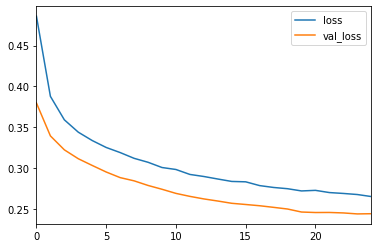

In [57]:
losses[['loss','val_loss']].plot()

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
predictions = model.predict_classes(X_test)

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     20621
           1       0.89      0.79      0.84     10530

    accuracy                           0.90     31151
   macro avg       0.90      0.87      0.88     31151
weighted avg       0.90      0.90      0.90     31151



In [61]:
confusion_matrix(y_test,predictions)

array([[19617,  1004],
       [ 2161,  8369]])